# IOWA Liqour Store data


In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
iowa_path = '/Users/Stav/Desktop/Iowa_Liquor_Sales_reduced.csv'
iowa = pd.read_csv(iowa_path)
iowa.head()

/Users/Stav/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


In [6]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709552 entries, 0 to 2709551
Data columns (total 18 columns):
Date                     object
Store Number             int64
City                     object
Zip Code                 object
County Number            float64
County                   object
Category                 float64
Category Name            object
Vendor Number            int64
Item Number              int64
Item Description         object
Bottle Volume (ml)       int64
State Bottle Cost        object
State Bottle Retail      object
Bottles Sold             int64
Sale (Dollars)           object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtypes: float64(4), int64(5), object(9)
memory usage: 372.1+ MB


In [9]:
iowa.shape

(2709552, 18)

In [14]:
iowa.groupby('Category Name').mean()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
Category Name,,,,,,,,,
100 PROOF VODKA,3715.597965,58.986838,1031100.0,311.890030,37558.639527,1098.720976,10.056646,10.413854,2.750965
AMARETTO - IMPORTED,2916.722222,61.666667,1082010.0,497.000000,903278.055556,750.000000,15.388889,11.541667,3.051389
AMERICAN ALCOHOL,3532.628864,54.454593,1101100.0,416.023098,44899.674192,751.684613,9.292810,6.994199,1.849185
AMERICAN AMARETTO,3404.960405,55.165863,1081010.0,367.663219,77001.194578,935.894216,8.171825,7.592321,2.005887
AMERICAN COCKTAILS,3354.734276,56.619393,1071100.0,269.179430,60118.865123,1562.970112,7.267468,11.211853,2.959579
AMERICAN DRY GINS,3567.406495,56.860963,1041100.0,308.769431,31977.119530,994.156121,9.190807,7.199731,1.901521
AMERICAN GRAPE BRANDIES,3772.205271,55.845397,1051010.0,183.939631,53070.754514,666.184300,10.985649,5.309156,1.403151
AMERICAN SLOE GINS,3410.717405,54.721003,1041200.0,431.120399,43613.530880,851.372427,4.817842,4.158921,1.098690
ANISETTE,3278.540052,63.623377,1081020.0,431.139535,91635.012920,750.000000,4.051680,3.038760,0.803669


In [19]:

iowa.groupby(['County','City','Store Number']).mean()

County Number      Category  \
County    City          Store Number                                
Adair     ADAIR         4417                    1.0  1.032968e+06   
                        4753                    1.0  1.034386e+06   
          FONTANELLE    4620                    1.0  1.037810e+06   
          GREENFIELD    3969                    1.0  1.040270e+06   
                        4317                    1.0  1.041119e+06   
                        5052                    1.0  1.035634e+06   
          STUART        3461                    1.0  1.039404e+06   
                        4654                    1.0  1.036693e+06   
Adams     CORNING       2327                    2.0  1.045576e+06   
Allamakee HARPERS FERRY 4896                    3.0  1.063419e+06   
          LANSING       5017                    3.0  1.043609e+06   
          POSTVILLE     4034                    3.0  1.042447e+06   
          WAUKON        2178                    3.0  1.042614e+06   
                        3857                    3.0  1.048091e+06   
                        4289                    3.0  1.044458e+06   
Appanoose CENTERVILLE   2523                    4.0  1.054088e+06   
                        4027                    4.0  1.042418e+06   
                        4046                    4.0  1.047599e+06   
                        4271                    4.0  1.044530e+06   
                        4472                    4.0  1.045661e+06   
          MORAVIA       4232                    4.0  1.045014e+06   
Audubon   AUDUBON       3631                    5.0  1.042984e+06   
                        5173                    5.0  1.050304e+06   
          EXIRA         4523                    5.0  1.035960e+06   
Benton    BELLE PLAINE  4025                    6.0  1.046412e+06   
                        4059                    6.0  1.038968e+06   
                        4070                    6.0  1.045092e+06   
          SHELLSBURG    4346                    6.0  1.045065e+06   
          URBANA        4551                    6.0  1.036370e+06   
          VINTON        4228                    6.0  1.044599e+06   
...                                             ...           ...   
Woodbury  SIOUX CITY    4565                   97.0  1.039590e+06   
                        4568                   97.0  1.040489e+06   
                        4588                   97.0  1.039654e+06   
                        4676                   97.0  1.041163e+06   
                        4703                   97.0  1.035506e+06   
                        4791                   97.0  1.044220e+06   
                        4879                   97.0  1.044609e+06   
                        4884                   97.0  1.052770e+06   
                        4975                   97.0  1.054637e+06   
                        5027                   97.0  1.037969e+06   
                        5045                   97.0  1.037924e+06   
                        5065                   97.0  1.053121e+06   
                        5076                   97.0  1.039541e+06   
                        5083                   97.0  1.038486e+06   
                        5086                   97.0  1.039146e+06   
                        5188                   97.0  1.039402e+06   
          SLOAN         4444                   97.0  1.035642e+06   
Worth     MANLY         5115                   98.0  1.042180e+06   
          NORTHWOOD     3664                   98.0  1.046433e+06   
          Northwood     4839                   98.0  1.044267e+06   
Wright    BELMOND       3654                   99.0  1.038706e+06   
                        4247                   99.0  1.045855e+06   
                        4398                   99.0  1.038840e+06   
          CLARION       3056                   99.0  1.040911e+06   
                        4358                   99.0  1.039094e+06   
                        4591        

VODKA 80 PROOF                        353491
CANADIAN WHISKIES                     269894
STRAIGHT BOURBON WHISKIES             153806
SPICED RUM                            145731
VODKA FLAVORED                        141964
TEQUILA                               121863
BLENDED WHISKIES                      116085
WHISKEY LIQUEUR                       109731
IMPORTED VODKA                        108106
PUERTO RICO & VIRGIN ISLANDS RUM       99756
FLAVORED RUM                           72696
TENNESSEE WHISKIES                     72148
AMERICAN COCKTAILS                     68255
AMERICAN DRY GINS                      65590
AMERICAN GRAPE BRANDIES                64802
IMPORTED VODKA - MISC                  64718
MISC. IMPORTED CORDIALS & LIQUEURS     63494
CREAM LIQUEURS                         62585
SCOTCH WHISKIES                        52301
IMPORTED GRAPE BRANDIES                46561
Name: Category Name, dtype: int64


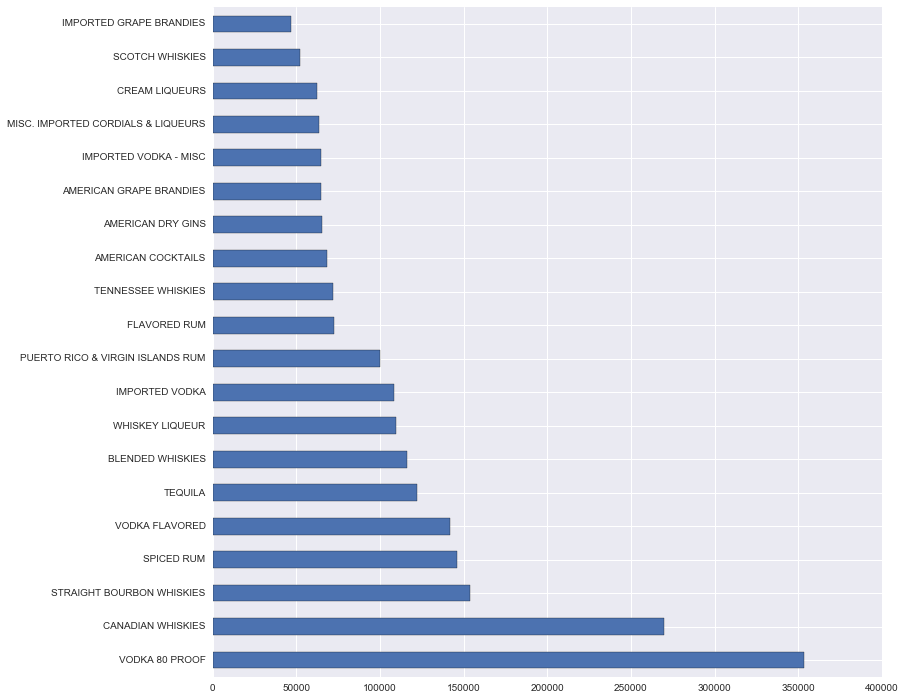

In [25]:
sns.set(rc={"figure.figsize": (12, 12)})
iowa['Category Name'].value_counts()[0:20].plot(kind = 'barh')
print iowa['Category Name'].value_counts()[0:20]

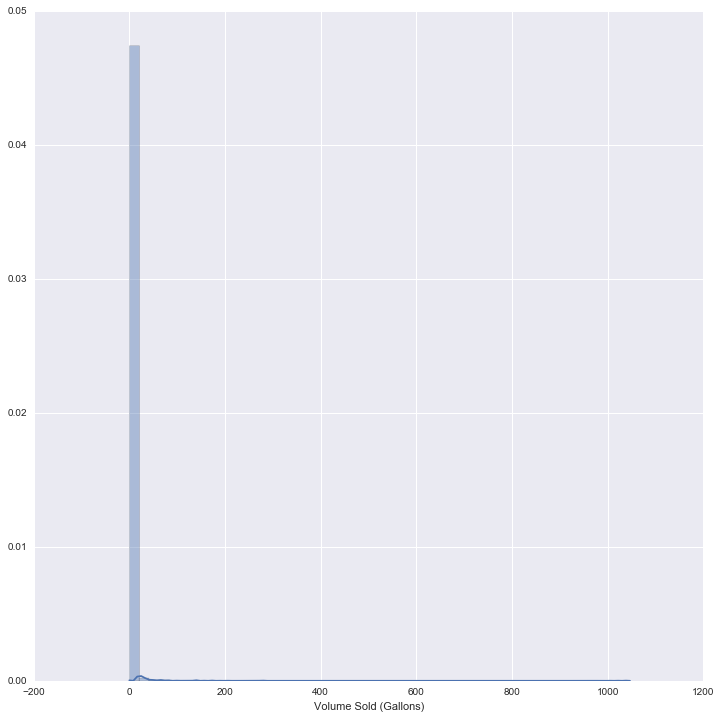

In [30]:
sns.distplot(iowa['Volume Sold (Gallons)'])

In [34]:
iowa['Volume Sold (Gallons)'].max()

1046.1199999999999

In [49]:
iowa[iowa['Volume Sold (Gallons)'] < 300].size

48770352